In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
plt.rcParams["figure.figsize"] = (10,6)

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data_files/Social_Network_Ads.csv")


In [ ]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


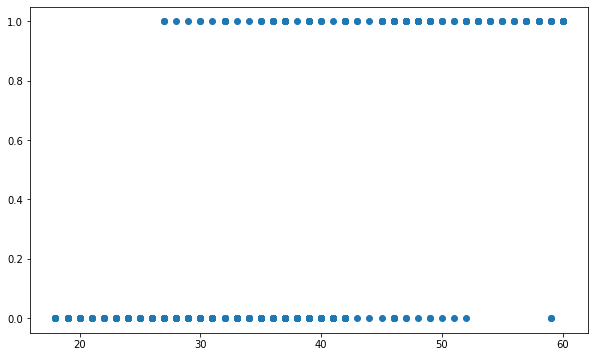

In [ ]:
plt.scatter(data['Age'], data['Purchased'])
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data['Age'], data['Purchased'])

In [ ]:
def normalize(X):
  return X - X.mean()

def predict(X,b0,b1):
  return np.array([1/(1+exp(-1*b0 + -1*b1*x)) for x in X])

def logistic_regression(X,Y):
  X = normalize(X)
  b0 = 0
  b1 = 0
  L = 0.001
  epochs = 300

  for epoch in range(epochs):
    y_pred = predict(X, b0, b1)
    D_b0 = -2 * sum((Y - y_pred) * y_pred * (1-y_pred))
    D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1-y_pred))
    b0 = b0 - L * D_b0
    b1 = b1 - L * D_b1
  return b0,b1

In [ ]:
b0, b1 = logistic_regression(x_train, y_train)

x_test_norm = normalize(x_test)
y_pred = predict(x_test_norm, b0, b1)
y_pred = [1 if p>=0.5 else 0 for p in y_pred]

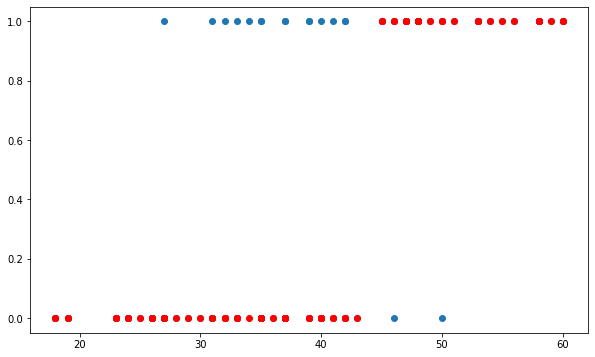

In [ ]:
plt.clf()
plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred, c="red")
plt.show()

In [ ]:
accuracy = 0
for i in range(len(y_pred)):
  if y_pred[i] == y_test.iloc[i]:
    accuracy += 1
print("Accuracy", accuracy/len(y_pred))

Accuracy 0.83


In [ ]:
confusion_matrix(y_test, y_pred)

array([[54,  2],
       [15, 29]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86        56
           1       0.94      0.66      0.77        44

    accuracy                           0.83       100
   macro avg       0.86      0.81      0.82       100
weighted avg       0.85      0.83      0.82       100



In [ ]:
# using sklearn

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
np.random.seed(0)

In [ ]:
x = data['Age']
y = data['Purchased']


In [ ]:
def normalize(X):
  return X - X.mean()

x = normalize(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values,
                                                    test_size=0.2)
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [ ]:
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
pred_LR = model.predict(x_test)

In [ ]:
confusion_matrix(y_test, pred_LR)

array([[57,  1],
       [ 4, 18]])

In [ ]:
print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        58
           1       0.95      0.82      0.88        22

    accuracy                           0.94        80
   macro avg       0.94      0.90      0.92        80
weighted avg       0.94      0.94      0.94        80

